# scraping with pandas

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from bs4 import BeautifulSoup
import requests 
import json
import re

**Check the website** of State Statistics Service of Ukraine https://ukrstat.org/uk/operativ/operativ2018/vvp/kkv_vvp/kkv_vvp_u/ksv_du2018_u.htm 

**Inspect** with CTRL+Shift+I

## Understanding webpage structure:

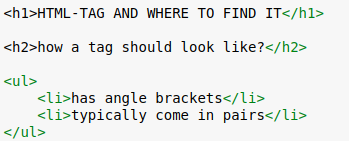

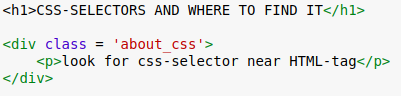

In [2]:
request = requests.get('https://ukrstat.org/uk/operativ/operativ2018/vvp/kkv_vvp/kkv_vvp_u/ksv_du2018_u.htm')
request.encoding = 'UTF-8'

soup = BeautifulSoup(request.content, 'lxml')

In [3]:
df = pd.read_html(str(soup), thousands='.',decimal=',')[1]
df = df.iloc[2:]

In [5]:
import ipdb
def clean_column(x):
    if x.dtype.kind is 'O':
#         ipdb.set_trace()
        return x.str.split(' ').str.join('').astype('float')
    else:
        return x
    
    
df.iloc[:,1:] = (
    df.iloc[:,1:].apply(lambda x: clean_column(x))
)

In [6]:
df.columns =  ['names', 'I_abs', 'I_percent', 'II_abs', 'II_percent',
               'III_abs', 'III_percent', 'IV_abs', 'IV_percent', 'year_abs', 'year_percent']

In [10]:
df[df.names.str.contains('кому')]

,names,I_abs,I_percent,II_abs,II_percent,III_abs,III_percent,IV_abs,IV_percent,year_abs,year_percent
8,Діяльність та послуги у галузі житлово-комунал...,1190,0.8,2256,1.2,2832,1.8,3850,1.7,10128,1.4


In [11]:
df.I_abs

2     157698
3      12624
4      13709
5      21452
6       6343
7        654
8       1190
9      20098
10      3578
11     39091
12     38959
Name: I_abs, dtype: object

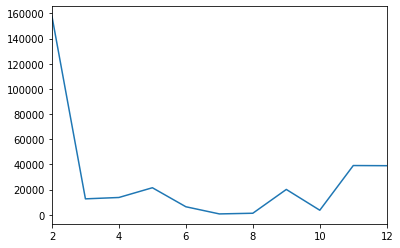

In [12]:
df.I_abs.plot()

<center>**CONGRATULATIONS! YOU SCRAPED A PAGE!**</center>

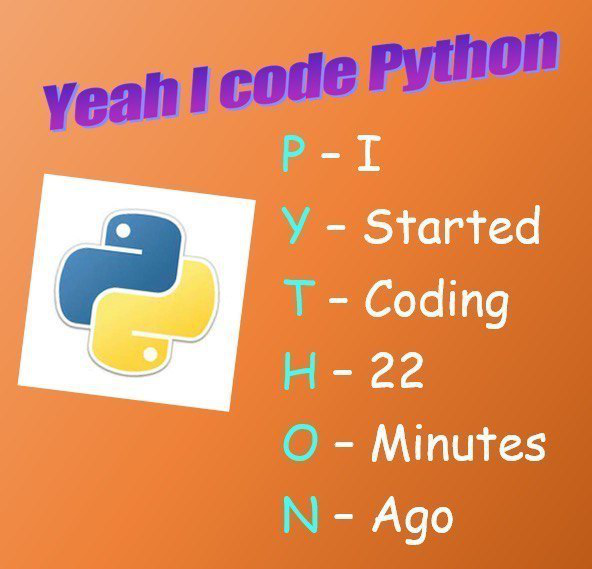

# scraping with bs4
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [114]:
request_atu = requests.get('http://atu.gki.com.ua/ua/united-communites')
request.encoding = 'UTF-8'

soup_atu = BeautifulSoup(request_atu.content, 'lxml')

In [115]:
# what was the heck was that?

['http://atu.gki.com.ua/ua/united-communites' + d['href'] for d in soup_atu.select('tbody a')]

['http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/186',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,186',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/41',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,41',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/42',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,42',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/43',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,43',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/44',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,44',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/45',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,45',
 'http:/

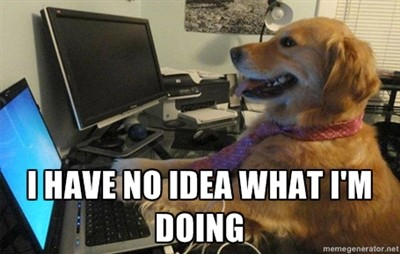

More about [list comprehension](https://www.datacamp.com/community/tutorials/python-list-comprehension?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=278443377095&utm_targetid=aud-299261629574:dsa-486527602543&utm_loc_interest_ms=&utm_loc_physical_ms=9061013&gclid=Cj0KCQjw4-XlBRDuARIsAK96p3AdE-I1mdSJHMJb0ZBNRn-Dpl-c24hlDqV7l3VPM0TbcAztMBRmcx0aAnG8EALw_wcB) 

In [51]:
# check the original page, it's just the same
soup_atu

<!DOCTYPE html>
<html class="gt-ie8" xml:lang="en" xmlns="https://www.w3.org/1999/xhtml">
<head>
<base href="//atu.gki.com.ua:80/"/>
<title>Об'єднані громади України</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Schema.org markup for Google+ -->
<meta content="Об'єднані громади України" itemprop="name"/>
<meta content="" itemprop="description"/>
<meta content="files/page_view/8968156226579914/" itemprop="image"/>
<!-- Twitter Card data -->
<meta content="" name="twitter:site"/>
<meta content="Об'єднані громади України" name="twitter:title"/>
<meta content="" name="twitter:description"/>
<!-- Twitter summary card with large image must be at least 280x150px -->
<meta content="files/page_view/8968156226579914/" name="twitter:image:src"/>
<!-- Open Graph data -->
<meta content="Об'єднані громади України" property="og:title"/>
<meta content="article" property="og:type"/>
<me

In [50]:
# we are looking for tbody - cause all the links are there 
soup_atu.select('tbody')

[<tbody>
 <tr>
 <td>1</td>
 <td class="text-bold">
 <u><a href="/ua/community-united-region/186">Вінницька  область</a></u>
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,186" target="_blank"><i class="fa fa-map-o"></i></a>
 </td>
 <td class="text-right">41</td>
 </tr>
 <tr>
 <td>2</td>
 <td class="text-bold">
 <u><a href="/ua/community-united-region/41">Волинська  область</a></u>
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,41" target="_blank"><i class="fa fa-map-o"></i></a>
 </td>
 <td class="text-right">52</td>
 </tr>
 <tr>
 <td>3</td>
 <td class="text-bold">
 <u><a href="/ua/community-united-region/42">Дніпропетровська  область</a></u>
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,42" target="_blank"><i class="fa fa-map-o"></i></a>
 </td>
 <td class="text-right">62</td>
 </tr>
 <tr>
 <td>4</td>
 <td class="text-bold">
 <u><a href="/ua/community-united-region/43">Донецька  област

In [59]:
# looks correct, yeh?

soup_atu.select('tbody a')

# soup_atu.select('title')

# soup_atu.select('div.header')


[<a href="/ua/community-united-region/186">Вінницька  область</a>,
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,186" target="_blank"><i class="fa fa-map-o"></i></a>,
 <a href="/ua/community-united-region/41">Волинська  область</a>,
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,41" target="_blank"><i class="fa fa-map-o"></i></a>,
 <a href="/ua/community-united-region/42">Дніпропетровська  область</a>,
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,42" target="_blank"><i class="fa fa-map-o"></i></a>,
 <a href="/ua/community-united-region/43">Донецька  область</a>,
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,43" target="_blank"><i class="fa fa-map-o"></i></a>,
 <a href="/ua/community-united-region/44">Житомирська  область</a>,
 <a class="more-details pull-right" href="/ua/karta#action=info-7376316114267884,44" target="_blank"><i class="fa fa-map-o">

In [60]:
# it is a list 
soup_atu.select('tbody a')[0]

# the thing is called list comprehension, it is shortcut to create lists is for loop
# here for d in soup_atu.select('tbody a') iterates over list of tags
# 'http://atu.gki.com.ua/ua/united-communites' + d['href'] is part adds full link to each small link
# at the end, you get list of page links that you can use for scraping
['http://atu.gki.com.ua/ua/united-communites' + d['href'] for d in soup_atu.select('tbody a')]

['http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/186',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,186',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/41',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,41',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/42',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,42',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/43',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,43',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/44',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,44',
 'http://atu.gki.com.ua/ua/united-communites/ua/community-united-region/45',
 'http://atu.gki.com.ua/ua/united-communites/ua/karta#action=info-7376316114267884,45',
 'http:/

In [153]:
soup_atu.find_all("span")

#you can look for it by a relative position

# soup_atu.find("table").find_next("a")

    
# you can looks for tag name and string inside
# soup.find_all('a', string='Волинська  область')


# you can check tag names with regex
# for tag in soup_atu.find_all(re.compile("^b")):
#     print(tag)

# you can check text with regex
# for f in soup_atu.find_all(string=re.compile("В")):
#     print(f)


[<span>Головна</span>,
 <span>Про портал</span>,
 <span>Довідка</span>,
 <span>Довідник</span>,
 <span>Карта</span>,
 <span>Проектні громади</span>,
 <span>Об'єднані громади</span>,
 <span>Постанови Верховної Ради України</span>,
 <span>Рішення обласних рад</span>]

<center>**Now you can scrape even more complex pages!**</center>

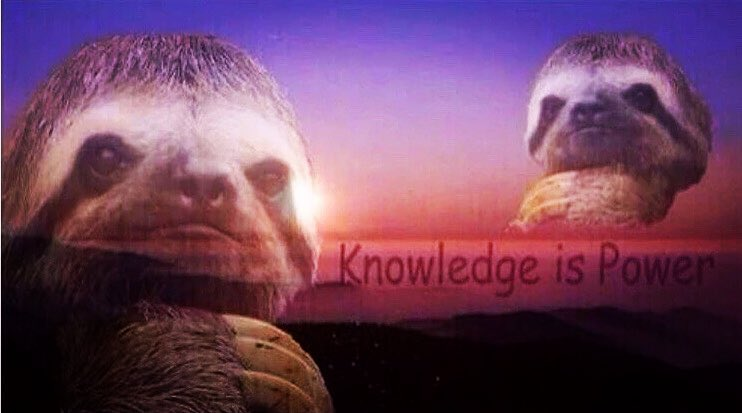

# lets play with complicated selectors

In [184]:
request = requests.get('https://www.president.gov.ua/news/administration')
request.encoding = 'UTF-8'

soup = BeautifulSoup(request.content, 'lxml')
soup.select('div.item_stat.cat_stat div.item_text p')


[<p>Заступник помічника Держсекретаря США висловив подяку Заступнику Глави Адміністрації Президента України за зусилля, яких доклали Президент України Петро Порошенко та його команда для зміцнення двосторонніх відносин між Україною та США за останні п'ять років.</p>,
 <p>У Міжнародний день визволення в’язнів фашистських таборів відбулося покладання квітів у Національному історико-меморіальному заповіднику «Бабин Яр» від Президента України Петра Порошенка.</p>,
 <p>8-9 квітня 2019 року українська делегація провела ряд робочих зустрічей з посадовими особами Європейського Союзу у м. Брюссель для обговорення стану реалізації реформ у сфері правосуддя в Україні.</p>,
 <p>Адміністрація Президента України спростовує розповсюджену деякими ЗМІ інформацію про нібито звільнення О.В.Філатова з посади заступника Глави АП.</p>,
 <p>«Для успішної реалізації реформ, які наразі відбуваються в сфері захисту дитинства, надзвичайно важливими є сталі партнерські відносини з потужними громадськими організац

# dealing with api

https://www.digitalocean.com/community/tutorials/how-to-use-web-apis-in-python-3

In [242]:
api = """https://openbudget.gov.ua/api/localBudgets/incomesLocal/?fundType=TOTAL&monthFrom=1&monthTo=12&year=2018&codeBudget=15316509000"""
received = requests.get(api).json()

In [244]:
received['items']

[{'level': 1,
  'code': '10000000',
  'codeName': 'Податкові надходження',
  'periodId': 4346303,
  'data': {'rozpisZmin': 3213900.0,
   'koshtorysZmin': 0.0,
   'faktPeriod': 3313698.57,
   'correctionYearDonePercent': 103.1},
  'children': [{'level': 2,
    'code': '14000000',
    'codeName': 'Внутрішні податки на товари та послуги',
    'periodId': 4346303,
    'data': {'rozpisZmin': 1064000.0,
     'koshtorysZmin': 0.0,
     'faktPeriod': 1154354.78,
     'correctionYearDonePercent': 108.49},
    'children': [{'level': 3,
      'code': '14020000',
      'codeName': 'Акцизний податок з вироблених в Україні підакцизних товарів (продукції)',
      'periodId': 4346303,
      'data': {'rozpisZmin': 163200.0,
       'koshtorysZmin': 0.0,
       'faktPeriod': 211469.69,
       'correctionYearDonePercent': 129.57},
      'children': [{'level': 4,
        'code': '14021900',
        'codeName': 'Пальне',
        'periodId': 4346303,
        'data': {'rozpisZmin': 163200.0,
         'koshtor

### You don't need this anymore (ok, maybe sometimes)

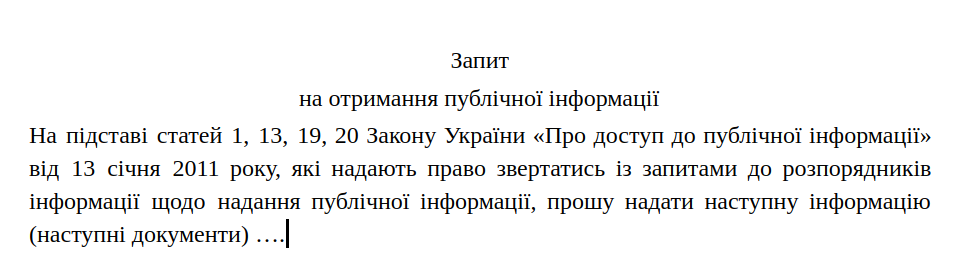

# homework 

You need to scrape election results for each polling station from website of Central Election Comission
https://www.cvk.gov.ua/pls/vp2019/wp335pt001f01=719.html 


## Please, contact us with any questions or comments

**Olena Nikulina**: [Fb](https://www.facebook.com/lena.nikulyna), nikulynaolena@gmail.com

**Peter Bodnar**: [Fb](https://www.facebook.com/peter.bodnar.794), peterbodnar1213@gmail.com